# Exercício 1.02 - Carregando dados para o Jupyter Lab

### Business Problem

Nosso cliente é uma empresa de cartões de crédito. Eles nos disponibilizaram um dataset que contém informações demográficas e financeiras dos últimos seis meses dos seus trinta mil clientes. Cada um dos registros representa uma conta e a carrega uma coluna que categoriza se, com base no histórico, o cliente não realizou o pagamento mínimo da fatura (default). Essa informação está na coluna "default payment next month".

### Objetivo

Desenvolver um modelo preditivo que determine se determinada conta realizará ou não o pagamento mínimo no próximo mês com base nos dados demográficos e históricos.

In [2]:
import pandas as pd

In [9]:
df= pd.read_excel("1.Data Exploration and Cleaning/data/default_of_credit_card_clients__courseware_version_1_21_19.xls")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [12]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
df.shape

(30000, 25)

# Exercício 1.03 e 1.04 - Verificação básica sobre a integridade dos dados

In [15]:
df['ID'].nunique()

29687

In [18]:
id_counts = df['ID'].value_counts()
id_counts

ID
ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
                ..
2edeb3a6-d38d    1
27e11893-92e9    1
2b1c282b-441e    1
bd737997-0eb0    1
15d69f9f-5ad3    1
Name: count, Length: 29687, dtype: int64

In [19]:
id_counts.value_counts()

count
1    29374
2      313
Name: count, dtype: int64

In [30]:
duplicated_mask = id_counts > 1
duplicated_ids = id_counts[id_counts > 1].index.tolist()

In [34]:
df.loc[df['ID'].isin(duplicated_ids)].sort_values('ID').head(20)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
15863,01355f46-3f0b,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15763,01355f46-3f0b,100000,2,2,2,23,Not available,2,2,2,...,96332,97560,95885,5000,4300,3600,3700,0,7300,0
21972,0170086d-7472,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21872,0170086d-7472,100000,2,1,1,25,0,0,-1,0,...,52079,40183,35796,28,103350,1722,1100,1300,2000,0
3284,02e41927-a6df,60000,2,2,2,21,0,0,0,0,...,25475,26010,26183,1859,1410,910,939,1000,1000,0
3384,02e41927-a6df,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26414,04299d54-61d4,160000,2,2,1,41,0,0,0,0,...,19825,22654,16158,10000,10000,5000,5000,5000,10000,0
26514,04299d54-61d4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4676,04c32736-903c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4576,04c32736-903c,90000,2,1,2,29,1,-1,-1,-2,...,0,0,0,194,0,0,0,0,217,0


In [44]:
df_zero_mask = df == 0

In [47]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [48]:
sum(feature_zero_mask)

315

In [52]:
df_clean_1 = df[~feature_zero_mask].copy()
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  int64 


In [54]:
df_clean_1['ID'].nunique()

29685

In [59]:
df_clean_1.to_csv("1.Data Exploration and Cleaning/data/df_clean_1.csv", index=False)

# Exercício 1.05 - Explorando e limpando os dados

In [62]:
df_clean = pd.read_csv("1.Data Exploration and Cleaning/data/df_clean_1.csv")
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29685 entries, 0 to 29684
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [64]:
df_clean['PAY_1'].value_counts()

PAY_1
0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: count, dtype: int64

In [65]:
valid_pay_1_mask = df_clean['PAY_1'] != 'Not available'

In [70]:
sum(valid_pay_1_mask)

26664

In [71]:
df_clean_2 = df_clean[valid_pay_1_mask].copy()

In [72]:
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29684
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  object
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  int64 


In [73]:
df_clean_2['PAY_1'].value_counts()

PAY_1
0     13087
-1     5047
1      3261
-2     2476
2      2378
3       292
4        63
5        23
8        17
6        11
7         9
Name: count, dtype: int64

In [75]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29684
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  int64 


In [76]:
df_clean_2.to_csv("1.Data Exploration and Cleaning/data/df_clean_2.csv", index=False)

# Exercício 1.06 - Explorando o limite de crédito e as variáveis demográficas

<Axes: >

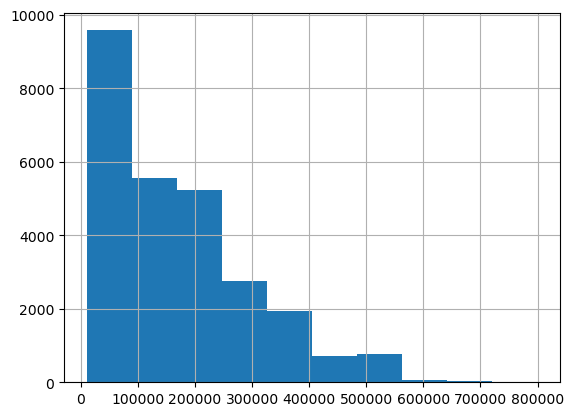

In [82]:
df_clean_2['LIMIT_BAL'].hist()

<Axes: >

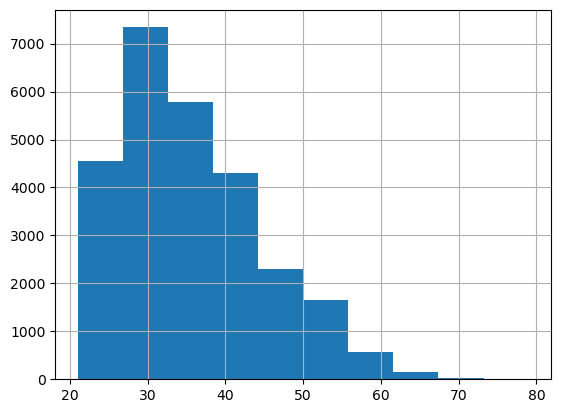

In [78]:
df_clean_2['AGE'].hist()

In [83]:
df_clean_2[['LIMIT_BAL','AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [84]:
df_clean_2['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: count, dtype: int64

In [86]:
df_clean_2['EDUCATION'].replace(to_replace=[0,5,6],value=4, inplace=True)

In [87]:
df_clean_2['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
4      414
Name: count, dtype: int64

In [88]:
df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      286
0       48
Name: count, dtype: int64

In [89]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      334
Name: count, dtype: int64

<Axes: xlabel='EDUCATION'>

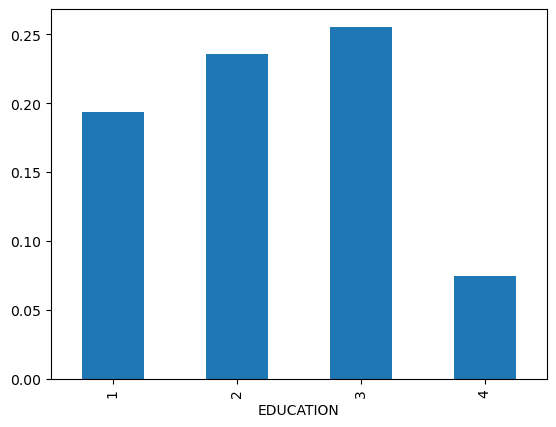

In [96]:
df_clean_2.groupby('EDUCATION')['default payment next month'].mean().plot(kind='bar')

A feature EDUCATION não tem relação linear com a variável target DEFAULT como demonstrado no gráfico acima.

O algoritmo regressão logística considera a linearidade entre a variável target e uma feature que está descrita como categórica ordinal (1 = graduate school(pós graduação), 2 = university, 3 = high school, 4 = others).

Por isso devemos implementar uma outra abordagem para tranformar essa informação categórica em numérica, veremos agora a estratégia de one-hot encoding

# Exercício 1.07 - Implementando One-Hot Encoding para a variável categórica

In [98]:
cat_mapping = {1:'gradute school',2:'university',3:'high school',4:'others'}

df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION','EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,gradute school
6,1,gradute school
7,2,university
8,3,high school
9,3,high school


In [105]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'],dtype=int)
edu_ohe

,gradute school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
29680,0,1,0,0
29681,0,1,0,0
29682,0,0,0,1
29683,0,1,0,0


In [110]:
df_w_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_w_ohe.drop('EDUCATION_CAT', axis=1, inplace=True)

In [111]:
df_w_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29684
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  int64 


In [113]:
df_w_ohe.to_csv("1.Data Exploration and Cleaning/data/df_w_ohe.csv",index=False)